In [1]:
import os
# working directory 설정
path = 'D:/2019_한화교육/textmining1'
os.chdir(path)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
data = pd.read_csv('imdb_review_classification.csv',engine='python')
data.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
type      50000 non-null object
review    50000 non-null object
label     50000 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [6]:
data['type'].value_counts()

train    25000
test     25000
Name: type, dtype: int64

In [7]:
train = data.loc[data['type']=='train',:]
test = data.loc[data['type']=='test',:]
train = train.drop(['type'],axis=1)
test = test.drop(['type'],axis=1)
train = train.reset_index(inplace=False,drop=True)
test = test.reset_index(inplace=False,drop=True)

In [8]:
train.head(3)

,review,label
0,Story of a man who has unnatural feelings for ...,neg
1,Airport '77 starts as a brand new luxury 747 p...,neg
2,This film lacked something I couldn't put my f...,neg


In [9]:
test.head(3)

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg


In [10]:
train['label'].value_counts()

pos    12500
neg    12500
Name: label, dtype: int64

In [11]:
test['label'].value_counts()

pos    12500
neg    12500
Name: label, dtype: int64

In [12]:
train['review'][100]

'This movie is a joke. I mean a "ha ha" funny joke. Why? Because the only redeeming thing about it was the good laugh I got at the sheer ridiculousness of nonsensical, inane plot and horrible acting. Wow!<br /><br />Within this movie there are so many unanswered questions... for example; why do these women become zombies and how? Why are there four black women who are zombie\'s "caretakers" and what is their purpose? Since when does 6 people make up a "nation" of Zombies? And is smeared black eye mascara "scary" to anyone, anywhere? Even a 2 year old?<br /><br />And lastly; Why was this movie made at all? Why? why? why? No answer? That\'s what I thought.<br /><br />On the demand channel they actually issued this comment after the synopsis of the movie: We apologize for this movie in advance" LOL. At least they had the decency to do this much!'

In [14]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(train['review'][100], "html5lib")
print(train['review'][100])
example1.get_text()

This movie is a joke. I mean a "ha ha" funny joke. Why? Because the only redeeming thing about it was the good laugh I got at the sheer ridiculousness of nonsensical, inane plot and horrible acting. Wow!<br /><br />Within this movie there are so many unanswered questions... for example; why do these women become zombies and how? Why are there four black women who are zombie's "caretakers" and what is their purpose? Since when does 6 people make up a "nation" of Zombies? And is smeared black eye mascara "scary" to anyone, anywhere? Even a 2 year old?<br /><br />And lastly; Why was this movie made at all? Why? why? why? No answer? That's what I thought.<br /><br />On the demand channel they actually issued this comment after the synopsis of the movie: We apologize for this movie in advance" LOL. At least they had the decency to do this much!


'This movie is a joke. I mean a "ha ha" funny joke. Why? Because the only redeeming thing about it was the good laugh I got at the sheer ridiculousness of nonsensical, inane plot and horrible acting. Wow!Within this movie there are so many unanswered questions... for example; why do these women become zombies and how? Why are there four black women who are zombie\'s "caretakers" and what is their purpose? Since when does 6 people make up a "nation" of Zombies? And is smeared black eye mascara "scary" to anyone, anywhere? Even a 2 year old?And lastly; Why was this movie made at all? Why? why? why? No answer? That\'s what I thought.On the demand channel they actually issued this comment after the synopsis of the movie: We apologize for this movie in advance" LOL. At least they had the decency to do this much!'

In [15]:
import re
# 정규표현식
letters_only = re.sub('[^a-zA-Z]',' ',example1.get_text())
letters_only

'This movie is a joke  I mean a  ha ha  funny joke  Why  Because the only redeeming thing about it was the good laugh I got at the sheer ridiculousness of nonsensical  inane plot and horrible acting  Wow Within this movie there are so many unanswered questions    for example  why do these women become zombies and how  Why are there four black women who are zombie s  caretakers  and what is their purpose  Since when does   people make up a  nation  of Zombies  And is smeared black eye mascara  scary  to anyone  anywhere  Even a   year old And lastly  Why was this movie made at all  Why  why  why  No answer  That s what I thought On the demand channel they actually issued this comment after the synopsis of the movie  We apologize for this movie in advance  LOL  At least they had the decency to do this much '

In [17]:
# 소문자화
lower_case = letters_only.lower()
# 토큰화
words = lower_case.split() # lower_case.split(' ')
print(len(words))
words[:10]

149


['this', 'movie', 'is', 'a', 'joke', 'i', 'mean', 'a', 'ha', 'ha']

In [18]:
' '.join(words)

'this movie is a joke i mean a ha ha funny joke why because the only redeeming thing about it was the good laugh i got at the sheer ridiculousness of nonsensical inane plot and horrible acting wow within this movie there are so many unanswered questions for example why do these women become zombies and how why are there four black women who are zombie s caretakers and what is their purpose since when does people make up a nation of zombies and is smeared black eye mascara scary to anyone anywhere even a year old and lastly why was this movie made at all why why why no answer that s what i thought on the demand channel they actually issued this comment after the synopsis of the movie we apologize for this movie in advance lol at least they had the decency to do this much'

In [19]:
# 불용어 제거
# NLTK 제거
# i, me, my it, this, that, is, are 같은 실제 의미에 큰 기여하지 않는 단어들
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmqa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
words = [w for w in words if not w in stopwords.words('english')]
print(len(words))
words[:10]

69


['movie',
 'joke',
 'mean',
 'ha',
 'ha',
 'funny',
 'joke',
 'redeeming',
 'thing',
 'good']

In [21]:
' '.join(words)

'movie joke mean ha ha funny joke redeeming thing good laugh got sheer ridiculousness nonsensical inane plot horrible acting wow within movie many unanswered questions example women become zombies four black women zombie caretakers purpose since people make nation zombies smeared black eye mascara scary anyone anywhere even year old lastly movie made answer thought demand channel actually issued comment synopsis movie apologize movie advance lol least decency much'

In [22]:
#stemming
stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print(stemmer.stem('running'))
print(stemmer.stem('runs'))
print(stemmer.stem('run'))

maximum
run
run
run


In [23]:
#stemming, lemmatization
from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()
print(lancaster_stemmer.stem('maximum'))
print(lancaster_stemmer.stem('running'))
print(lancaster_stemmer.stem('runs'))
print(lancaster_stemmer.stem('run'))

maxim
run
run
run


In [24]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
s_words = [stemmer.stem(w) for w in words]
s_words[:20]

['movi',
 'joke',
 'mean',
 'ha',
 'ha',
 'funni',
 'joke',
 'redeem',
 'thing',
 'good',
 'laugh',
 'got',
 'sheer',
 'ridicul',
 'nonsens',
 'inan',
 'plot',
 'horribl',
 'act',
 'wow']

In [25]:
#lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemmatizer= WordNetLemmatizer()
print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))
print(wordnet_lemmatizer.lemmatize('movies'))
print(wordnet_lemmatizer.lemmatize('movie'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmqa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


fly
fly
movie
movie


In [26]:
l_words = [wordnet_lemmatizer.lemmatize(w) for w in words]
l_words[:20]

['movie',
 'joke',
 'mean',
 'ha',
 'ha',
 'funny',
 'joke',
 'redeeming',
 'thing',
 'good',
 'laugh',
 'got',
 'sheer',
 'ridiculousness',
 'nonsensical',
 'inane',
 'plot',
 'horrible',
 'acting',
 'wow']

In [27]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z]',' ',review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(' '.join(stemming_words))

In [28]:
print(train['review'][100])
clean_review = review_to_words(train['review'][100])
clean_review

This movie is a joke. I mean a "ha ha" funny joke. Why? Because the only redeeming thing about it was the good laugh I got at the sheer ridiculousness of nonsensical, inane plot and horrible acting. Wow!<br /><br />Within this movie there are so many unanswered questions... for example; why do these women become zombies and how? Why are there four black women who are zombie's "caretakers" and what is their purpose? Since when does 6 people make up a "nation" of Zombies? And is smeared black eye mascara "scary" to anyone, anywhere? Even a 2 year old?<br /><br />And lastly; Why was this movie made at all? Why? why? why? No answer? That's what I thought.<br /><br />On the demand channel they actually issued this comment after the synopsis of the movie: We apologize for this movie in advance" LOL. At least they had the decency to do this much!


'movi joke mean ha ha funni joke redeem thing good laugh got sheer ridicul nonsens inan plot horribl act wow within movi mani unansw question exampl women becom zombi four black women zombi caretak purpos sinc peopl make nation zombi smear black eye mascara scari anyon anywher even year old last movi made answer thought demand channel actual issu comment synopsi movi apolog movi advanc lol least decenc much'

In [29]:
num_reviews = train['review'].size
num_reviews

25000

In [30]:
clean_train_reviews = []
for i in range(num_reviews):
    if (i+1) % 500 == 0:
        print('Review {} of {}'.format(i+1, num_reviews))
    clean_train_reviews.append(review_to_words(train['review'][i]))
#%time train['review_clean'] = train['review'].apply(review_to_words)    

Review 500 of 25000
Review 1000 of 25000
Review 1500 of 25000
Review 2000 of 25000
Review 2500 of 25000
Review 3000 of 25000
Review 3500 of 25000
Review 4000 of 25000
Review 4500 of 25000
Review 5000 of 25000
Review 5500 of 25000
Review 6000 of 25000
Review 6500 of 25000
Review 7000 of 25000
Review 7500 of 25000
Review 8000 of 25000
Review 8500 of 25000
Review 9000 of 25000
Review 9500 of 25000
Review 10000 of 25000
Review 10500 of 25000
Review 11000 of 25000
Review 11500 of 25000
Review 12000 of 25000
Review 12500 of 25000
Review 13000 of 25000
Review 13500 of 25000
Review 14000 of 25000
Review 14500 of 25000
Review 15000 of 25000
Review 15500 of 25000
Review 16000 of 25000
Review 16500 of 25000
Review 17000 of 25000
Review 17500 of 25000
Review 18000 of 25000
Review 18500 of 25000
Review 19000 of 25000
Review 19500 of 25000
Review 20000 of 25000
Review 20500 of 25000
Review 21000 of 25000
Review 21500 of 25000
Review 22000 of 25000
Review 22500 of 25000
Review 23000 of 25000
Review 2

In [31]:
clean_test_reviews = []
for i in range(num_reviews):
    if (i+1) % 500 == 0:
        print('Review {} of {}'.format(i+1, num_reviews))
    clean_test_reviews.append(review_to_words(test['review'][i]))
#%time test['review_clean'] = test['review'].apply(review_to_words)

Review 500 of 25000
Review 1000 of 25000
Review 1500 of 25000
Review 2000 of 25000
Review 2500 of 25000
Review 3000 of 25000
Review 3500 of 25000
Review 4000 of 25000
Review 4500 of 25000
Review 5000 of 25000
Review 5500 of 25000
Review 6000 of 25000
Review 6500 of 25000
Review 7000 of 25000
Review 7500 of 25000
Review 8000 of 25000
Review 8500 of 25000
Review 9000 of 25000
Review 9500 of 25000
Review 10000 of 25000
Review 10500 of 25000
Review 11000 of 25000
Review 11500 of 25000
Review 12000 of 25000
Review 12500 of 25000
Review 13000 of 25000
Review 13500 of 25000
Review 14000 of 25000
Review 14500 of 25000
Review 15000 of 25000
Review 15500 of 25000
Review 16000 of 25000
Review 16500 of 25000
Review 17000 of 25000
Review 17500 of 25000
Review 18000 of 25000
Review 18500 of 25000
Review 19000 of 25000
Review 19500 of 25000
Review 20000 of 25000
Review 20500 of 25000
Review 21000 of 25000
Review 21500 of 25000
Review 22000 of 25000
Review 22500 of 25000
Review 23000 of 25000
Review 2

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data=None,backgroundcolor='white',
                    width=800,height=800):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=backgroundcolor,\
                          width=width, height=height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

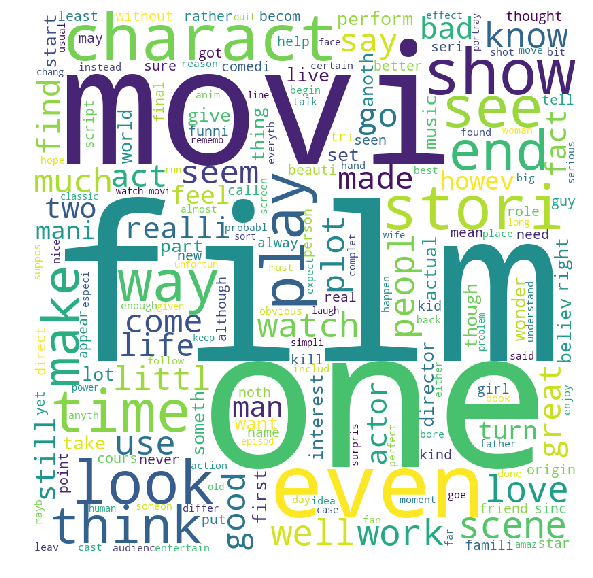

Wall time: 15.3 s


In [33]:
%time displayWordCloud(' '.join(clean_train_reviews))

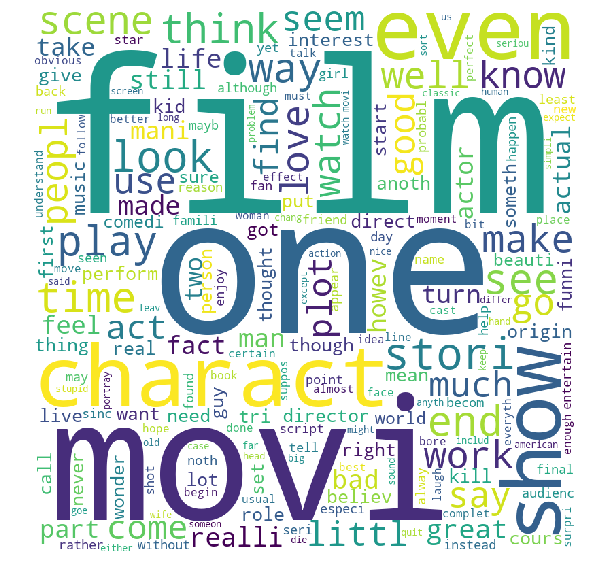

Wall time: 14.8 s


In [34]:
%time displayWordCloud(' '.join(clean_test_reviews))

In [38]:
import pickle
with open('train_preprocessed_imdb.pkl','wb') as f:
    pickle.dump(clean_train_reviews, f)

with open('test_preprocessed_imdb.pkl','wb') as f:
    pickle.dump(clean_test_reviews, f)